<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_ReinforcementLearning_QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

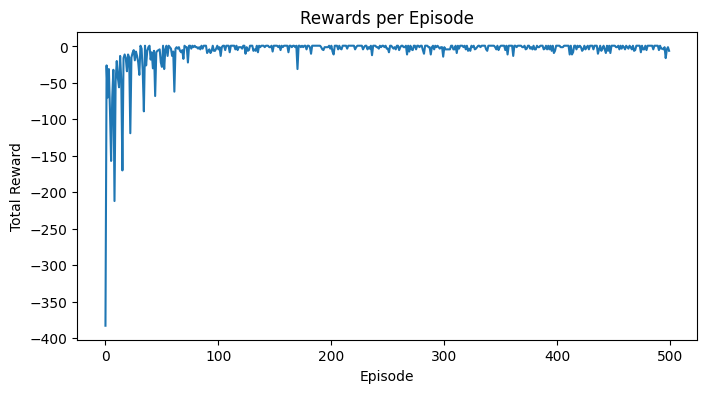

[(0, 0),
 (1, 0),
 (2, 0),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 3),
 (5, 3),
 (5, 4),
 (5, 5)]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
import time

# ======================================================
# 1. Define Grid Environment
# ======================================================

class WarehouseEnv:
    def __init__(self):
        # 6x6 grid
        self.rows = 6
        self.cols = 6

        # Define obstacles, congested areas, start, and goal
        self.obstacles = {(1,1), (1,2), (3,4), (3,5)}
        self.congested = {(0,3), (2,3), (4,1)}
        self.start = (0,0)
        self.goal = (5,5)

        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        r, c = self.state

        # Define actions
        if action == 0:    # up
            nr, nc = r - 1, c
        elif action == 1:  # down
            nr, nc = r + 1, c
        elif action == 2:  # left
            nr, nc = r, c - 1
        elif action == 3:  # right
            nr, nc = r, c + 1

        next_state = (nr, nc)

        # Check wall / boundary
        if nr < 0 or nr >= self.rows or nc < 0 or nc >= self.cols:
            reward = -5
            next_state = self.state  # invalid move -> stay
        # Check obstacle
        elif next_state in self.obstacles:
            reward = -5
            next_state = self.state
        # Goal reached
        elif next_state == self.goal:
            reward = +10
        # Congested area
        elif next_state in self.congested:
            reward = -3
        else:
            reward = -1  # normal move penalty

        self.state = next_state
        done = (next_state == self.goal)
        return next_state, reward, done

# ======================================================
# 2. Initialize environment & Q-table
# ======================================================

env = WarehouseEnv()
actions = 4  # up, down, left, right

Q = np.zeros((env.rows, env.cols, actions))

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 500

# ======================================================
# 3. Training with Q-learning
# ======================================================

def epsilon_greedy(state):
    if random.uniform(0,1) < epsilon:
        return random.randint(0, actions-1)
    else:
        r, c = state
        return np.argmax(Q[r,c])

rewards_per_episode = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = epsilon_greedy(state)
        next_state, reward, done = env.step(action)

        r, c = state
        nr, nc = next_state

        # Q-update
        Q[r,c,action] += alpha * (
            reward + gamma * np.max(Q[nr,nc]) - Q[r,c,action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)

# ======================================================
# 4. Plot training reward curve
# ======================================================

plt.figure(figsize=(8,4))
plt.plot(rewards_per_episode)
plt.title("Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# ======================================================
# 5. Visualize optimal path
# ======================================================

def extract_optimal_path():
    state = env.start
    path = [state]
    visited = set()

    for _ in range(50):  # hard limit to avoid infinite loops
        r, c = state
        action = np.argmax(Q[r,c])

        # translate action
        if action == 0: nxt = (r-1, c)
        elif action == 1: nxt = (r+1, c)
        elif action == 2: nxt = (r, c-1)
        elif action == 3: nxt = (r, c+1)

        # if stuck or revisiting, break
        if nxt in visited:
            break
        visited.add(nxt)

        path.append(nxt)
        state = nxt

        if state == env.goal:
            break

    return path

optimal_path = extract_optimal_path()
optimal_path
